In [1]:
# Author : Ramesh kumar Nunna

# Email : rxn162030@utdallas.edu

from scipy import stats # dealing with probability distributions
import pandas as pd # for data manupulation and analysis
import matplotlib.pyplot as plt #for plotting
import numpy as np  # dealing with arrays
import dateutil # datetime module
import statistics # provides functions for calculating mathematical statistics

# Load data from csv file path
data = pd.read_csv('Desktop/data_science_screening_exercise_orders.csv')

# computing most_recent_order_date
customer_recentorder = data.groupby(['customer_id','gender'], sort=False)['date'].max()

# converting series to dataframe and resetting index
customer_recentorder_df = customer_recentorder.to_frame().reset_index()

# renaming column names
customer_recentorder_df.columns = ['customer_id','gender','most_recent_order_date']

# couting orders placed by the customer
order_count = data['customer_id'].value_counts()

# converting series to dataframe and resetting index
order_count_df = order_count.to_frame().reset_index()

# renaming column names
order_count_df.columns = ['customer_id','order_count']

   
# Problem statement
print("""
    Dataframe with one row per customer and the following columns:
    * customer_id
    * gender
    * most_recent_order_date
    * order_count (number of orders placed by this customer)
    ------------------------------------------------------------""")

# solution

# Joining order_count dataframe with customer_recentorder dataframe 
customer_dataframe = customer_recentorder_df.set_index('customer_id').join(order_count_df.set_index('customer_id'))
print(customer_dataframe)




    Dataframe with one row per customer and the following columns:
    * customer_id
    * gender
    * most_recent_order_date
    * order_count (number of orders placed by this customer)
    ------------------------------------------------------------
             gender most_recent_order_date  order_count
customer_id                                            
1000              0          1/1/2017 0:11            1
1001              0          1/1/2017 0:29            1
1002              1        2/19/2017 21:35            3
1003              1         4/26/2017 2:37            4
1004              0          1/1/2017 3:11            1
1005              1        12/16/2017 1:39            2
1006              1         5/9/2017 15:27            3
1007              0         1/1/2017 15:59            1
1008              0        12/17/2017 5:47            3
1009              1         1/1/2017 19:27            1
1010              1        4/28/2017 13:31            2
1011              

Populating the interactive namespace from numpy and matplotlib
Assumption: Week 1 begins on January 1, regardless of what day of the week that might be


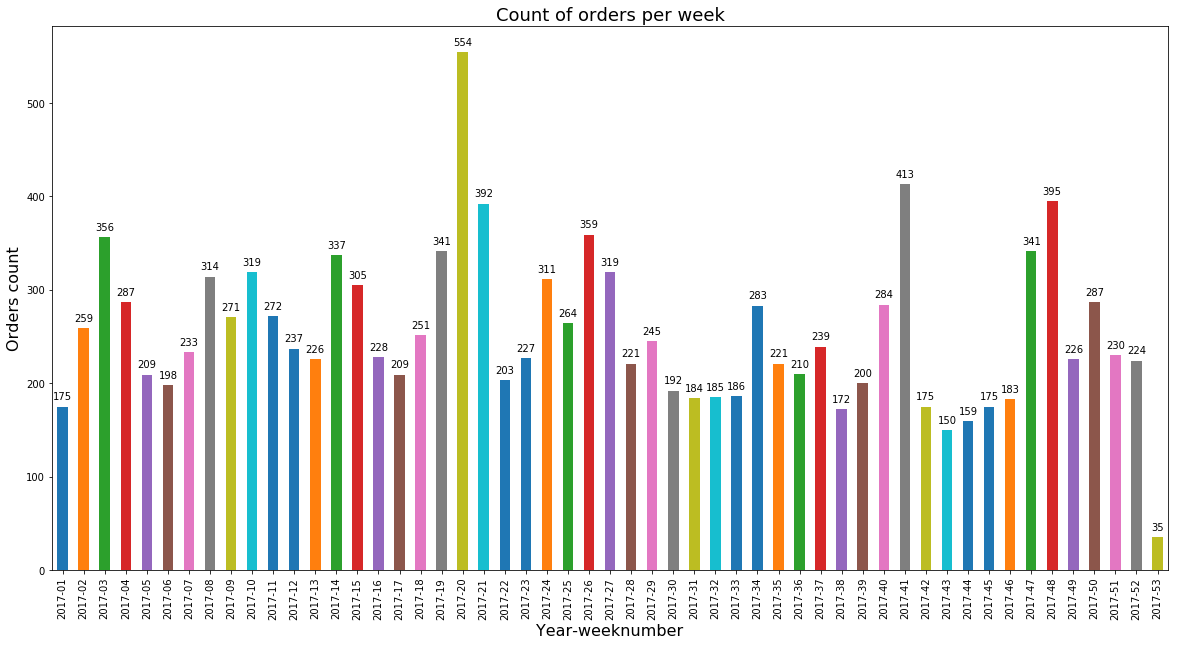

In [2]:
#resizing image size
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)

print("Assumption: Week 1 begins on January 1, regardless of what day of the week that might be")

data['date'] = pd.to_datetime(data['date'])

# converting date to Year_week_number
data['Year_Week_Number'] = data.date.dt.strftime('%Y-%U')

# computing orders count per week
Orders_count_week = data.groupby(['Year_Week_Number'])['value'].count()

# renaming columns
Orders_count_week.columns = ['Year_Week_Number','Orders per Week']

# plotting bar graph
ax = Orders_count_week.plot.bar()

# annotate bars with values 
for p in ax.patches: ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.title('Count of orders per week',fontsize=18)

plt.ylabel('Orders count',fontsize=16)
plt.xlabel('Year-weeknumber',fontsize=16)
plt.show()

In [3]:
# Problem statement
print("""
Mean order value for gender 0 and for gender 1:
----------------------------------------------""")

# computing mean of gender0
gender0_mean = data.groupby('gender')['value'].mean()[0]

print(" -> mean order value of gender0 is " + str(round(gender0_mean,2)))
print("\n")

# computing mean of gender1
gender1_mean = data.groupby('gender')['value'].mean()[1]
print(" -> mean order value of gender1 is " + str(round(gender1_mean,2)))

print("""
Check whether difference between genders mean order value is significant:
-------------------------------------------------------------------------""")
# sample size
N = (data['customer_id'].count())/2

                                                     
print("Performing a 2 sample t-test to test whether mean order value of gender 1 in the dataset is different from gender 0")
print("\n")
print("Null Hypothesis : Mean order values of gender 0 and gender 1 are the same")
print("\n")
print("Alternate Hypothesis : Mean order values of gender 0 and gender 1 are the different")
print("\n")

# computing variance of gender0
gender0_var = data.groupby('gender')['value'].var(ddof=1)[0]

# computing variance of gender1
gender1_var = data.groupby('gender')['value'].var(ddof=1)[1]

# computing standard deviation
s = np.sqrt((gender0_var + gender1_var)/2)

# computing t-statistics
t = (gender0_mean - gender1_mean)/(s*np.sqrt(2/N))
print(" -> t value is " + str(round(t,4)))
print("\n")

## Compare with the critical t-value
# Degrees of freedom
df = 2*N - 2

# p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)

# multiply p value with 2 because its a two tail t-test
p_new = round(2*p,4)

print(" -> p value is " + str(p_new))
print("\n")

if ( p_new < 0.05 ):
    print("""we can infer from above that after comparing the t statistic with the critical t value  we get a good p value of """ +  str(round(2*p,4))  + """ and thus we reject the null hypothesis and thus it proves that the "mean order value of the two genders are different and statistically significant" """)
else:
    print("""we can infer from above that after comparing the t statistic with the critical t value  we get a good p value of """ +  str(round(2*p,4))  + """ and thus we accept the null hypothesis and thus it proves that the "mean order value of the two genders are same" """)


Mean order value for gender 0 and for gender 1:
----------------------------------------------
 -> mean order value of gender0 is 363.89


 -> mean order value of gender1 is 350.71

Check whether difference between genders mean order value is significant:
-------------------------------------------------------------------------
Performing a 2 sample t-test to test whether mean order value of gender 1 in the dataset is different from gender 0


Null Hypothesis : Mean order values of gender 0 and gender 1 are the same


Alternate Hypothesis : Mean order values of gender 0 and gender 1 are the different


 -> t value is 1.976


 -> p value is 0.0482


we can infer from above that after comparing the t statistic with the critical t value  we get a good p value of 0.0482 and thus we reject the null hypothesis and thus it proves that the "mean order value of the two genders are different and statistically significant" 
